In [1]:
from neuralprophet import NeuralProphet

In [2]:
from neuralprophet import set_log_level

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### Silence any deprecation warnings that may occur.
### Comment this if there are any issues with code
import warnings
def nowarnings(*args, **kargs): pass
warnings.warn = nowarnings

In [5]:
# print(os.listdir(os.curdir))

In [6]:
df = pd.read_csv('STA-DK0034A.csv')
df.head()

,DatetimeEnd,aqi
0,2013-01-01 00:00:00+01:00,21.0
1,2013-01-02 00:00:00+01:00,41.0
2,2013-01-03 00:00:00+01:00,39.0
3,2013-01-04 00:00:00+01:00,48.0
4,2013-01-05 00:00:00+01:00,33.0


In [7]:
### Renaming columns
df.rename(columns = {'DatetimeEnd':'ds', 'aqi':'y'}, inplace = True)
df.head()

,ds,y
0,2013-01-01 00:00:00+01:00,21.0
1,2013-01-02 00:00:00+01:00,41.0
2,2013-01-03 00:00:00+01:00,39.0
3,2013-01-04 00:00:00+01:00,48.0
4,2013-01-05 00:00:00+01:00,33.0


In [8]:
### Converting to datetime
df['ds'] = pd.DatetimeIndex(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                               
---  ------  --------------  -----                               
 0   ds      3590 non-null   datetime64[ns, pytz.FixedOffset(60)]
 1   y       3590 non-null   float64                             
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), float64(1)
memory usage: 56.2 KB


In [9]:
### Remove timezone info as it is not supported by NeuroProphet
df['ds'] = df['ds'].dt.tz_localize(None)
df.head()

,ds,y
0,2013-01-01,21.0
1,2013-01-02,41.0
2,2013-01-03,39.0
3,2013-01-04,48.0
4,2013-01-05,33.0


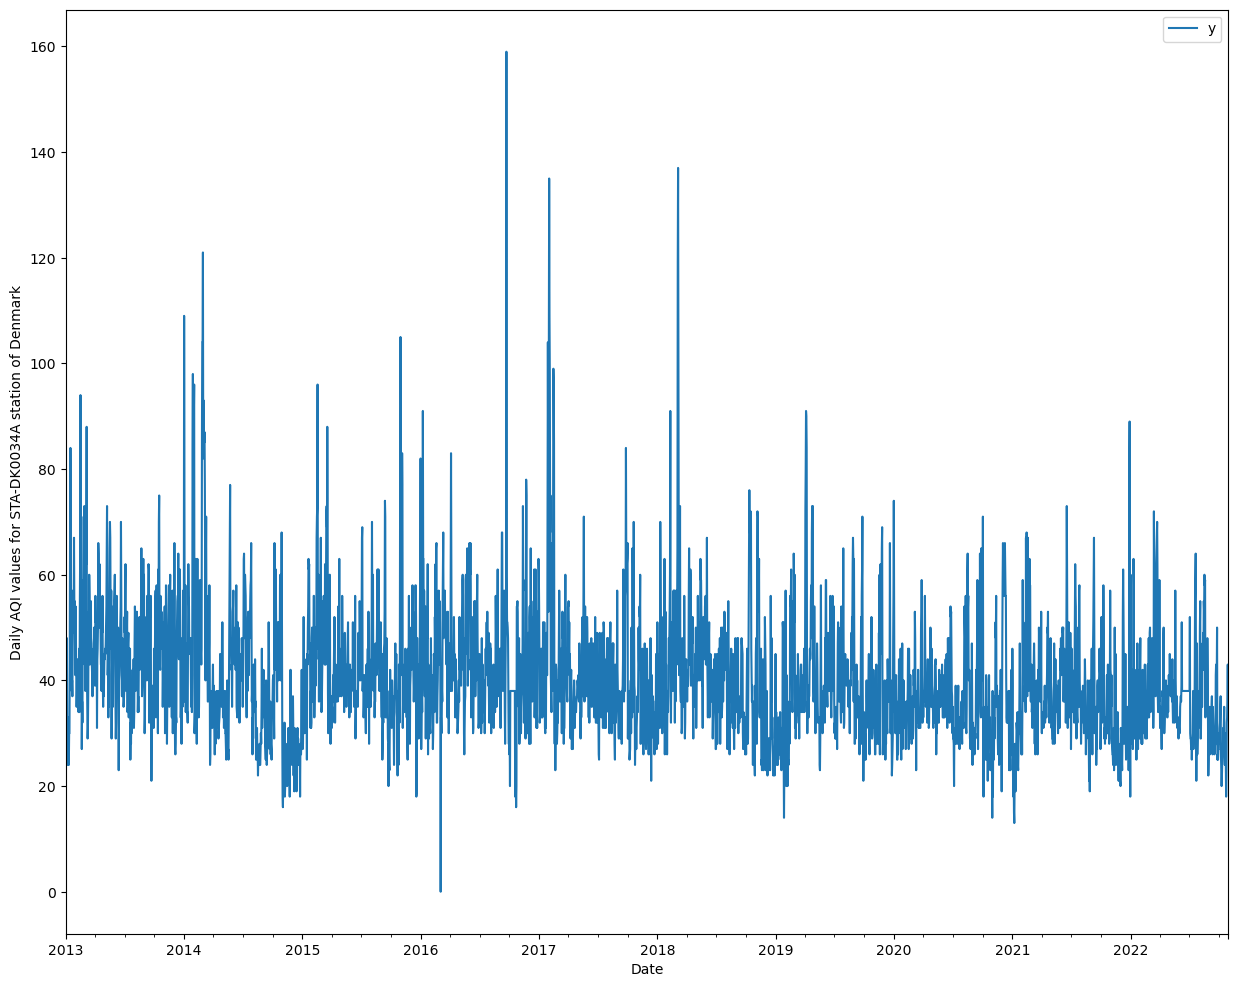

In [10]:
### Visualize the final daily AQI timeseries
ax = df.set_index('ds').plot(figsize=(15, 12))
ax.set_ylabel('Daily AQI values for STA-DK0034A station of Denmark')
ax.set_xlabel('Date')

plt.show()

In [11]:
### test run
m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.15)
print(f"df_train size:{len(df_train)}, df_val size:{len(df_val)}")
metrics = m.fit(df_train, freq='D', validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.967% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140


  0%|          | 0/137 [00:00<?, ?it/s]

df_train size:3052, df_val size:538


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.03E-02, min: 1.63E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.03E-02, min: 1.40E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.35E-02
Epoch[140/140]: 100%|██████████| 140/140 [00:16<00:00,  8.50it/s, SmoothL1Loss=0.0179, MAE=8.58, RMSE=11.6, RegLoss=0, MAE_val=6.87, RMSE_val=9.83, SmoothL1Loss_val=0.0122]


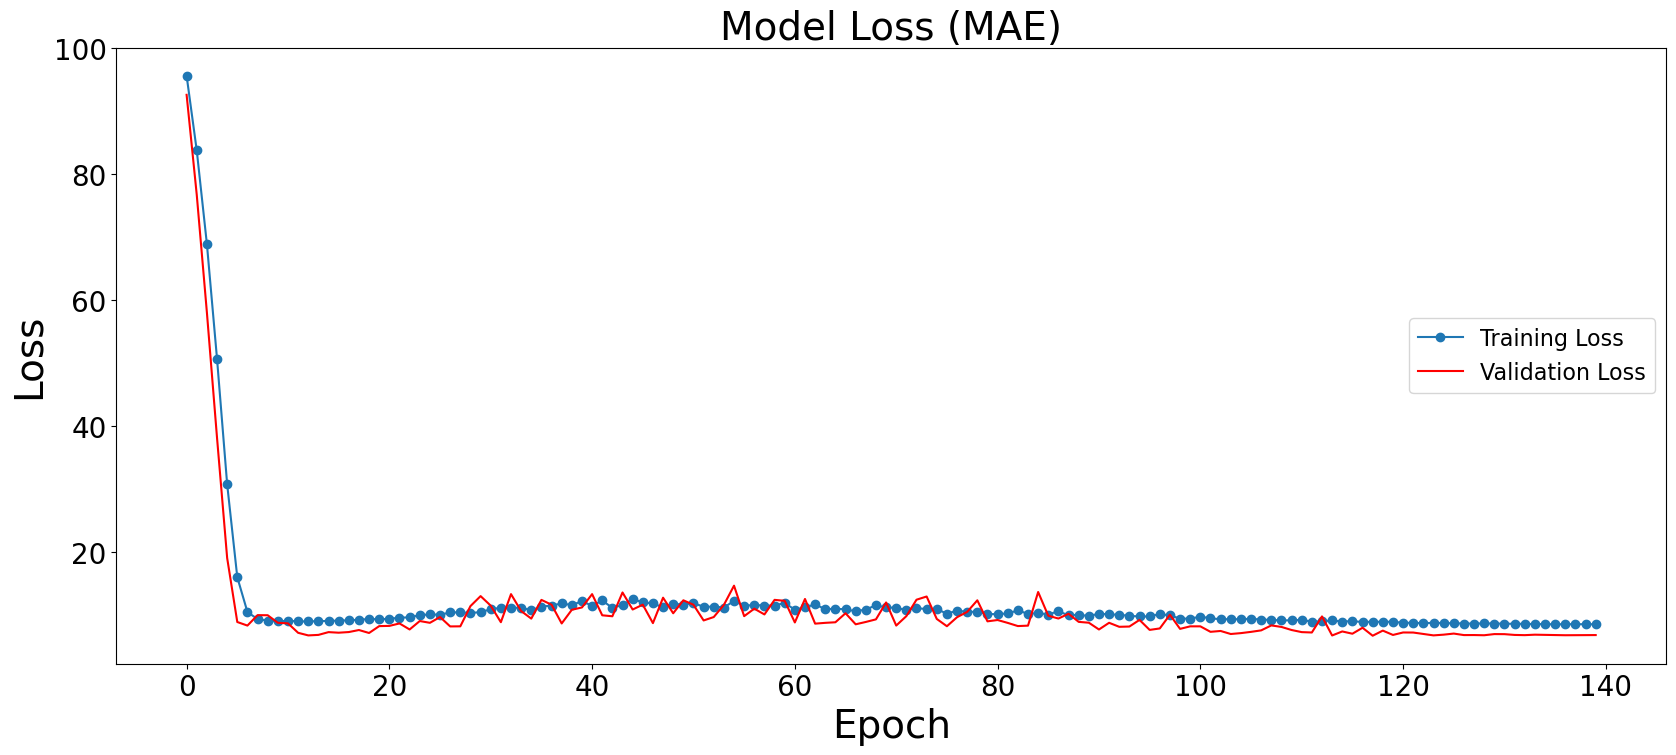

In [12]:
### Plot model loss
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE)", fontsize=28)
plt.show()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.814% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.814% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


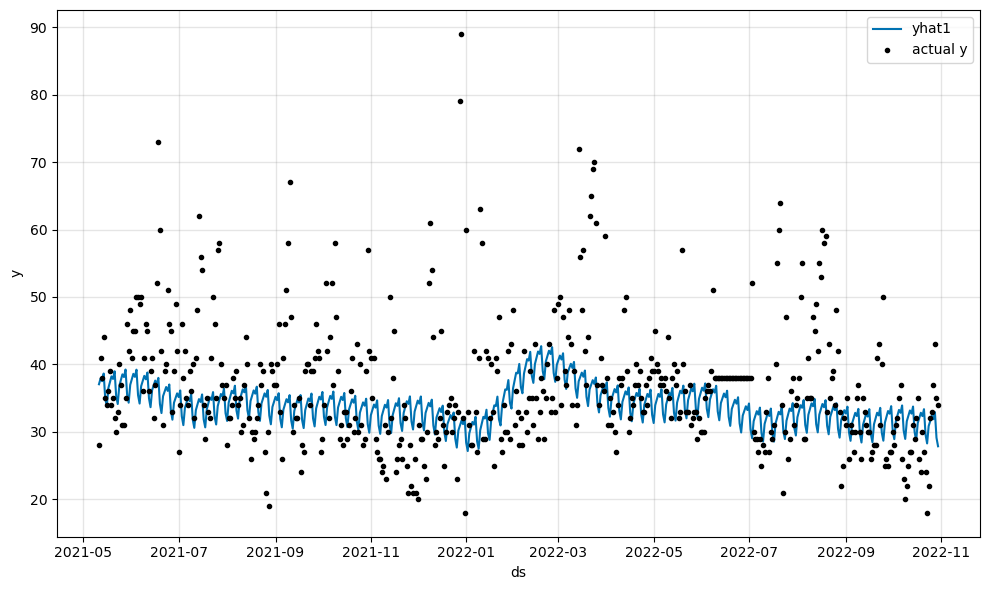

In [13]:
### Apply trained model onto df_val data and visualize prediction plot vs actual data
forecast = m.predict(df_val)
fig_forecast = m.plot(forecast)
plt.show()

In [14]:
### Create experiments dict, where we will save metrics data for each DL run
experiments_dict = {}

In [15]:
### experiment one
m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment one'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 148


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.32E+00, min: 1.54E+00


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.97E-02, min: 1.76E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.09E-01
Epoch[148/148]: 100%|██████████| 148/148 [00:14<00:00, 10.12it/s, SmoothL1Loss=0.0176, MAE=8.8, RMSE=11.9, RegLoss=0, MAE_val=7.34, RMSE_val=9.83, SmoothL1Loss_val=0.0115] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.907% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.907% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


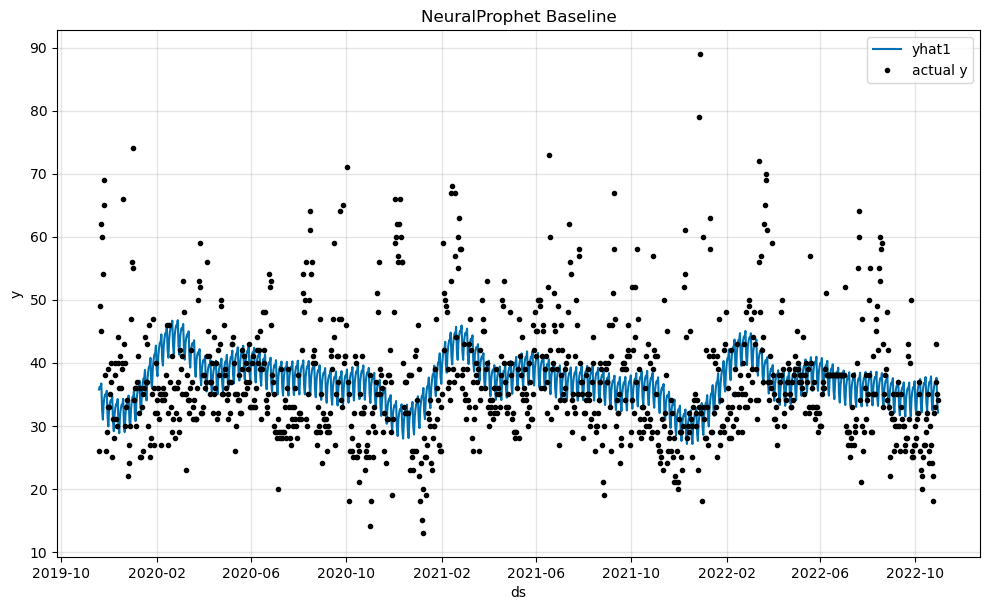

In [16]:
m.plot(forecast)
plt.title('NeuralProphet Baseline')
plt.show()

In [17]:
### experiment two
m = NeuralProphet(n_lags=30)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment two'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 148


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.97E-02, min: 5.20E-01


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.14E-02, min: 7.09E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.86E-02
Epoch[148/148]: 100%|██████████| 148/148 [00:16<00:00,  9.16it/s, SmoothL1Loss=0.0114, MAE=7.06, RMSE=9.63, RegLoss=0, MAE_val=6.07, RMSE_val=8.02, SmoothL1Loss_val=0.00761]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


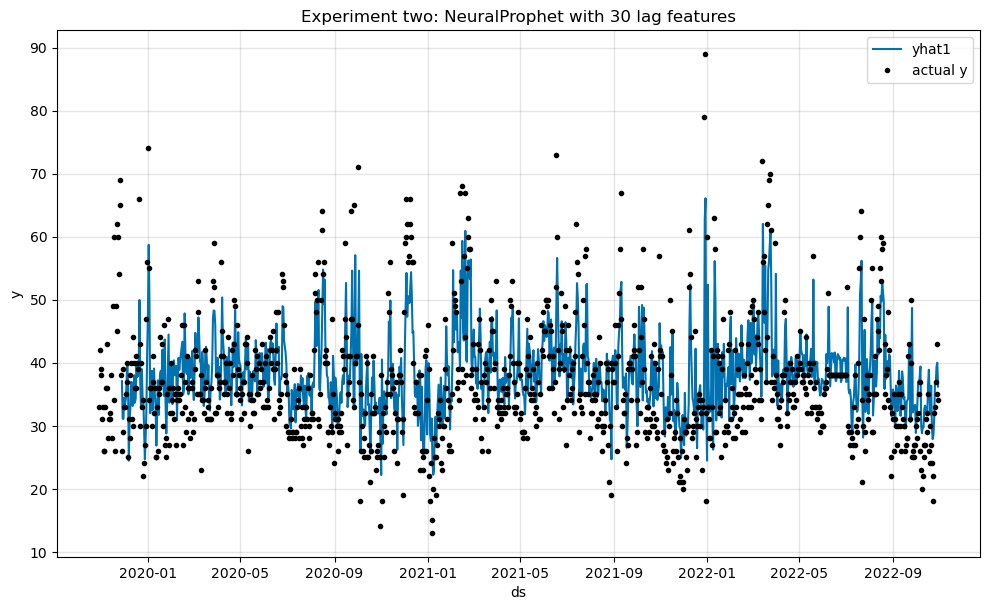

In [18]:
m.plot(forecast)
plt.title('Experiment two: NeuralProphet with 30 lag features')
plt.show()

In [19]:
### experiment three
m = NeuralProphet(n_lags=120)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment three'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.961% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 149


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.03E-03, min: 8.28E-01


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.03E-03, min: 3.82E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.36E-02
Epoch[149/149]: 100%|██████████| 149/149 [00:16<00:00,  9.12it/s, SmoothL1Loss=0.0112, MAE=7.01, RMSE=9.43, RegLoss=0, MAE_val=6.27, RMSE_val=8.31, SmoothL1Loss_val=0.00819]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.914% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.914% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


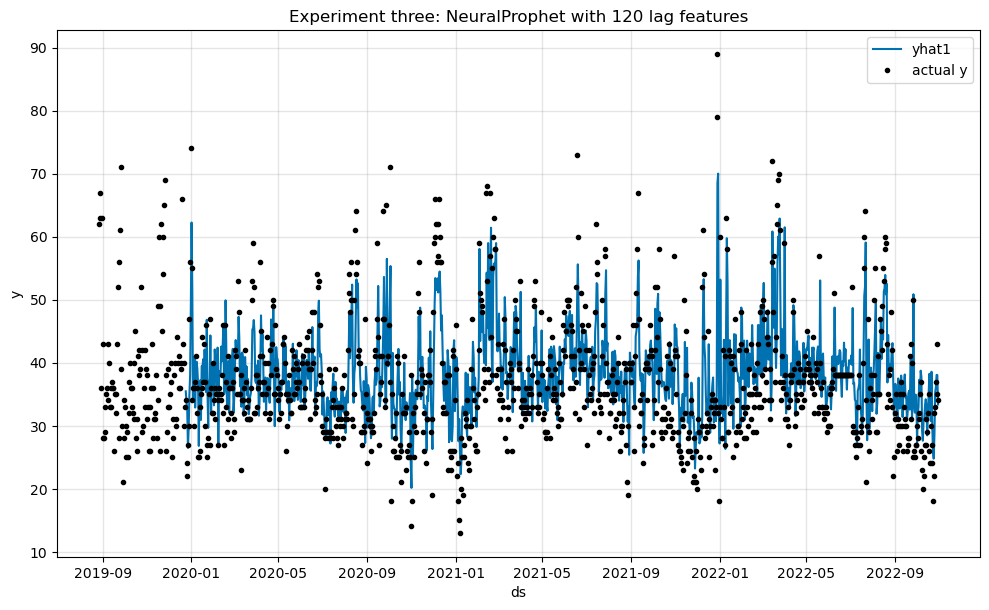

In [20]:
m.plot(forecast)
plt.title('Experiment three: NeuralProphet with 120 lag features')
plt.show()

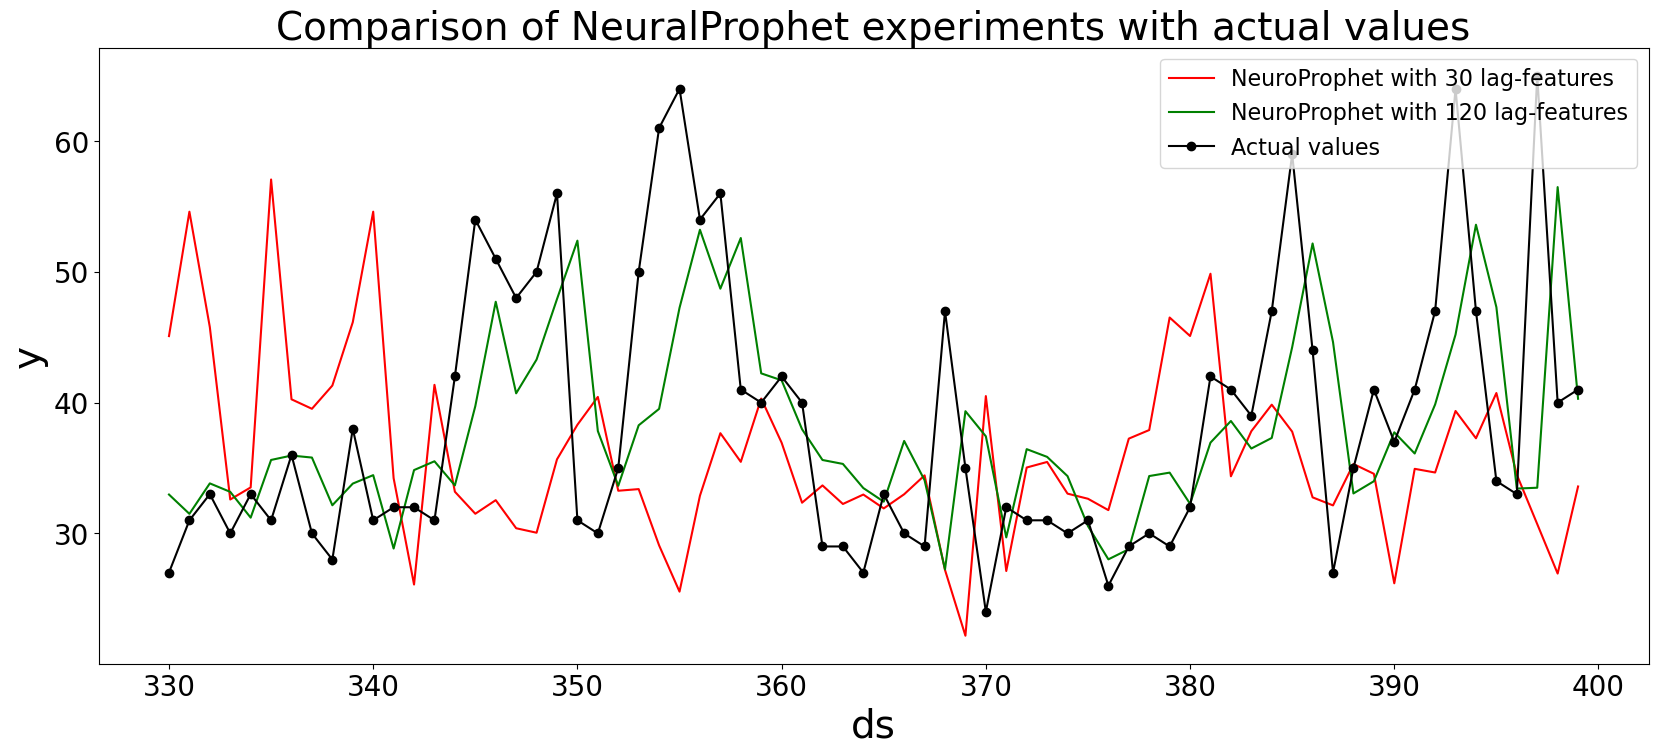

In [21]:
### Compare two experiments with different number of lag-features
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(experiments_dict["experiment two"]['yhat1'][330:400], '-r', color='red', label="NeuroProphet with 30 lag-features")  
ax.plot(experiments_dict["experiment three"]['yhat1'][330:400], '-r', color='green', label="NeuroProphet with 120 lag-features")
ax.plot(df_val["y"][330:400], '-o', color='black', label="Actual values")
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("ds", fontsize=28)
ax.set_ylabel("y", fontsize=28)
ax.set_title("Comparison of NeuralProphet experiments with actual values", fontsize=28)
plt.show()

По графику видно что вариант с 120 lag-фичами немного точнее приближает график реальных значений. <br>
Попробуем еще в качестве эксперимента вариант с 240 и 360 lag-фичами

In [22]:
### experiment four
m = NeuralProphet(n_lags=240)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment four'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.961% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 151


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 7.71E-02


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.90E-02, min: 3.03E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.75E-02
Epoch[151/151]: 100%|██████████| 151/151 [00:15<00:00,  9.58it/s, SmoothL1Loss=0.0106, MAE=6.85, RMSE=9.18, RegLoss=0, MAE_val=6.45, RMSE_val=8.47, SmoothL1Loss_val=0.00848]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.92% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.92% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


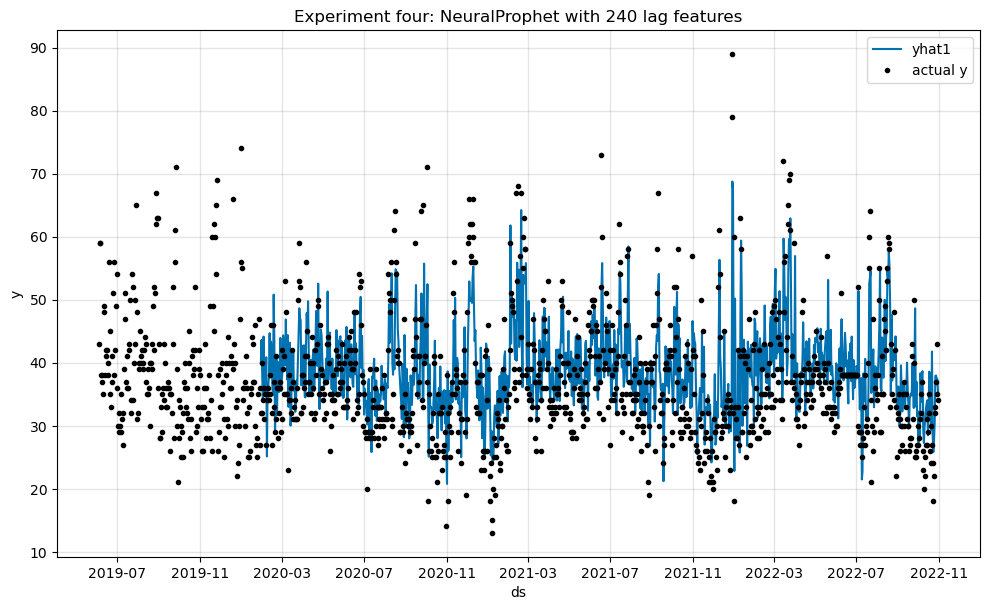

In [23]:
m.plot(forecast)
plt.title('Experiment four: NeuralProphet with 240 lag features')
plt.show()

In [24]:
### experiment five
m = NeuralProphet(n_lags=360)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment five'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.962% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.14E-03, min: 1.05E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.14E-03, min: 1.05E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.71E-03
Epoch[152/152]: 100%|██████████| 152/152 [00:15<00:00,  9.87it/s, SmoothL1Loss=0.0104, MAE=6.77, RMSE=9.11, RegLoss=0, MAE_val=7.75, RMSE_val=9.77, SmoothL1Loss_val=0.0113] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.925% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.925% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


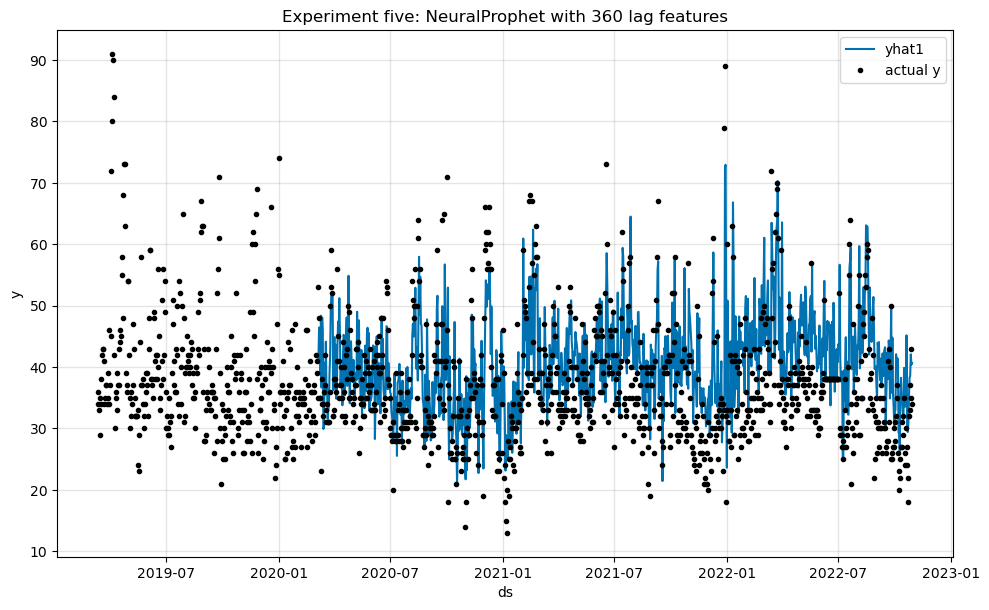

In [25]:
m.plot(forecast)
plt.title('Experiment five: NeuralProphet with 360 lag features')
plt.show()

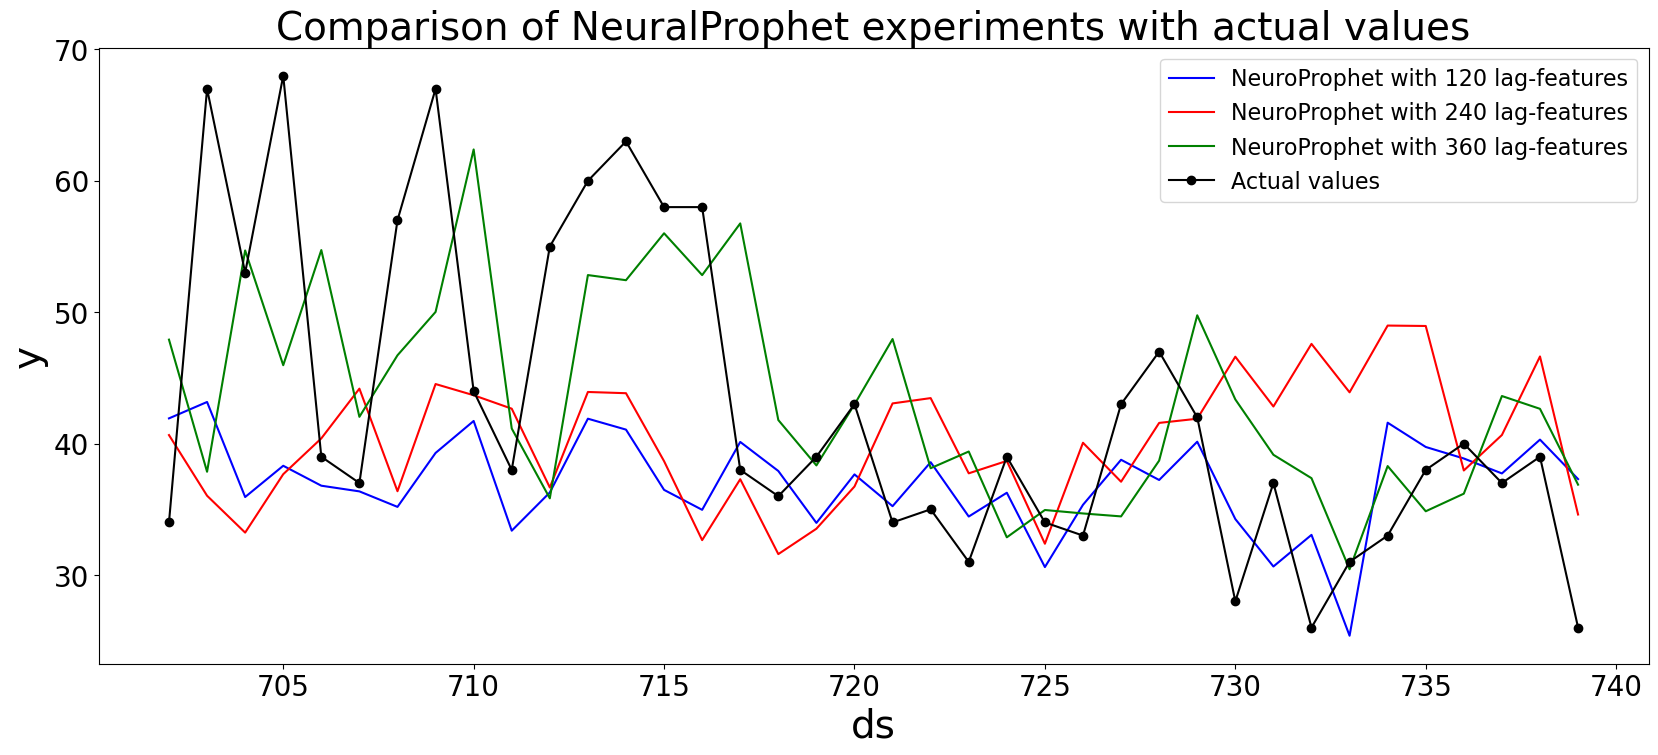

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
# ax.plot(experiments_dict["experiment two"]['yhat1'][530:600], '-r', color='orange', label="NeuroProphet with 30 lag-features")  
ax.plot(experiments_dict["experiment three"]['yhat1'][702:740], '-r', color='blue', label="NeuroProphet with 120 lag-features")
ax.plot(experiments_dict["experiment four"]['yhat1'][702:740], '-r', color='red', label="NeuroProphet with 240 lag-features")  
ax.plot(experiments_dict["experiment five"]['yhat1'][702:740], '-r', color='green', label="NeuroProphet with 360 lag-features")
ax.plot(df_val["y"][702:740], '-o', color='black', label="Actual values")
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("ds", fontsize=28)
ax.set_ylabel("y", fontsize=28)
ax.set_title("Comparison of NeuralProphet experiments with actual values", fontsize=28)
plt.show()

Кажется что при увеличении кол-ва lag-фичей предсказанные значения лучше соотносятся с реальными значениями AQI. От 360 уже получается довольно неплохое приближение графика. Для дальнейших экспериментов выберем кол-во lag-фичей чуть больше 360 (равное 400) и на этом пока остановимся.

In [27]:
### experiment six
m = NeuralProphet(
    n_lags=400,
)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment six'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.962% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 153


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.34E-03, min: 1.23E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.57E-03, min: 1.23E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.95E-03
Epoch[153/153]: 100%|██████████| 153/153 [00:15<00:00,  9.96it/s, SmoothL1Loss=0.00952, MAE=6.55, RMSE=8.77, RegLoss=0, MAE_val=7.59, RMSE_val=9.57, SmoothL1Loss_val=0.0108] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.926% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.926% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


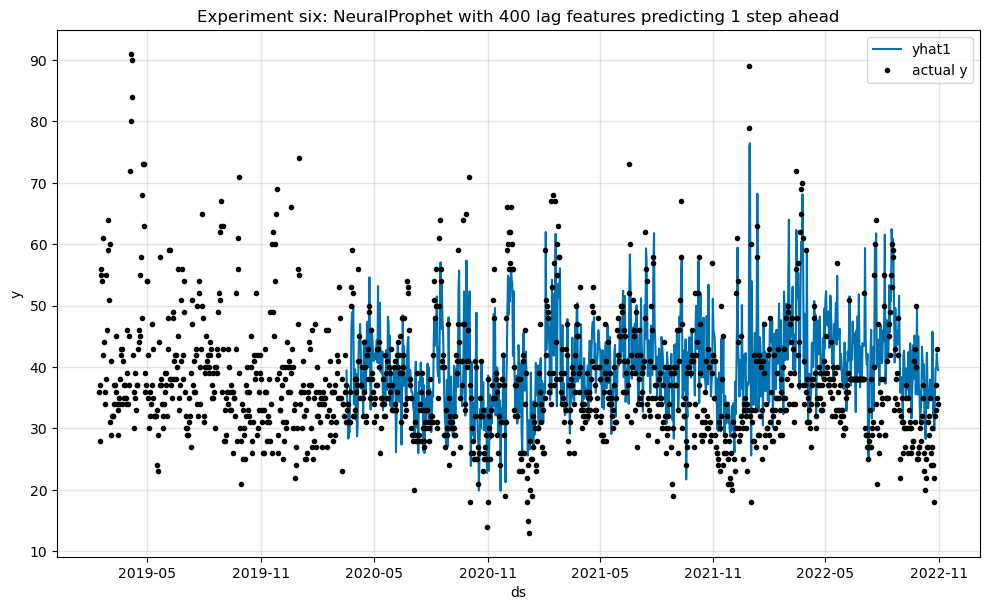

In [28]:
m.plot(forecast)
plt.title('Experiment six: NeuralProphet with 400 lag features predicting 1 step ahead')
plt.show()

In [29]:
### experiment seven
m = NeuralProphet(
    n_lags=400,
    n_forecasts = 7
)
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.3)
metrics = m.fit(df_train, freq='D', validation_df=df_val)
forecast = m.predict(df_val)
experiments_dict['experiment seven'] = forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.962% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 153


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.03E-02, min: 7.71E-02


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.59E-02, min: 5.65E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.28E-02
Epoch[153/153]: 100%|██████████| 153/153 [00:20<00:00,  7.64it/s, SmoothL1Loss=0.0138, MAE=7.83, RMSE=10.7, RegLoss=0, MAE_val=8.61, RMSE_val=10.8, SmoothL1Loss_val=0.0138]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.926% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.927% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


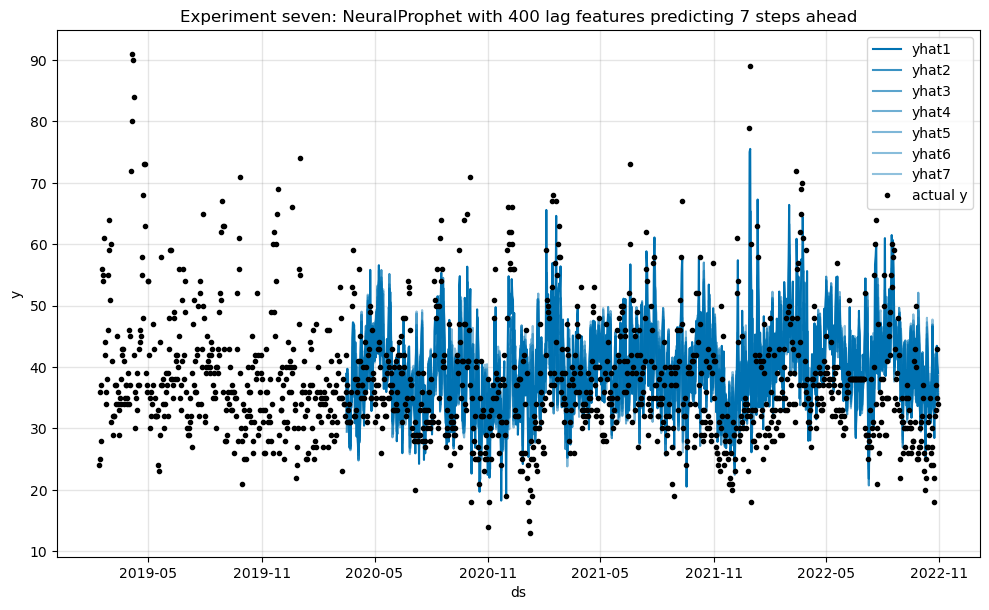

In [30]:
m.plot(forecast)
plt.title('Experiment seven: NeuralProphet with 400 lag features predicting 7 steps ahead')
plt.show()

Параметр "n_forecasts" мы оставим равным 1, так как метрики для такого варианта все-таки похуже.

Теперь сравним полученную итоговую модель с простой линейной регрессией с таким же количеством фичей.

In [31]:
def feature_creator(df_temp,number_of_lag_features=400): # Generate only numeric features
    df = df_temp.copy()
    df.columns = ['aqi_d0']
    n_features = int(number_of_lag_features)
    current_column_name = 'aqi_d0'
    prev_column_name = 'aqi_d0'
    iternum = 1
    for i in range(n_features):
        current_column_name = current_column_name[:5] + str(iternum)
        df[current_column_name] = df[prev_column_name].shift(1)
        iternum +=1
        prev_column_name = current_column_name
    return df

In [32]:
tsf = pd.read_csv('STA-DK0034A.csv', low_memory=False)
tsf['DatetimeEnd'] = pd.to_datetime(tsf['DatetimeEnd'], format="%Y-%m-%d %H:%M:%S")
tsf = tsf.set_index('DatetimeEnd')
tsf400 = feature_creator(tsf)
# tsf400.head().T

In [33]:
tsf400 = tsf400.iloc[400:,:]
# tsf400.head().T

In [34]:
def data_splitter(df_temp):
    df = df_temp
    df_train = df[df.index < "2019-02-12 00:00:00+01:00"].copy()
    df_test = df[df.index >= "2019-02-12 00:00:00+01:00"].copy()
    return df_train, df_test

In [35]:
df_train400, df_test400 = data_splitter(tsf400)

In [36]:
columns_to_drop = ['aqi_d0']
y_train400 = df_train400['aqi_d0']
X_train400 = df_train400.drop(columns_to_drop, axis=1)
y_test400 = df_test400['aqi_d0']
X_test400 = df_test400.drop(columns_to_drop, axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [38]:
### Standard linear regression with 400 features
scaler = StandardScaler()
scaler.fit(X_train400)
X_train_scaled = scaler.transform(X_train400)
X_test_scaled = scaler.transform(X_test400)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train400)
pred_train400 = lr_scaled.predict(X_train_scaled)
pred_test400 = lr_scaled.predict(X_test_scaled)
print('RMSE:', np.sqrt(MSE(y_test400, pred_test400)))

RMSE: 9.14422140140031


In [39]:
linreg_results = df_test400.copy()
linreg_results.drop(linreg_results.iloc[:, 1:], inplace=True, axis=1)
linreg_results['pred'] = pred_test400

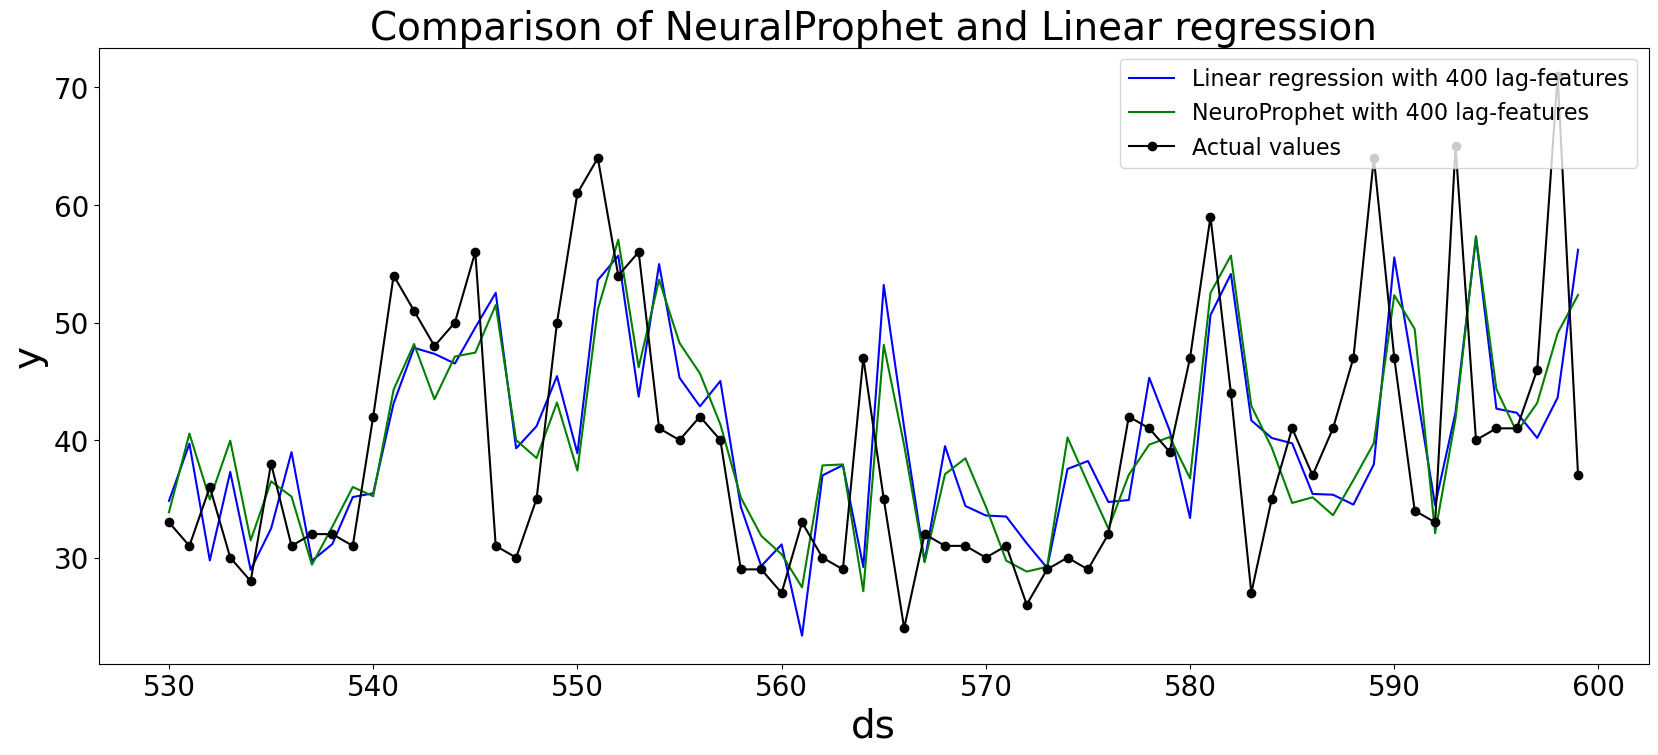

In [40]:
fig, ax = plt.subplots(figsize=(20, 8))  
ax.plot(pd.Series(pred_test400)[530:600], '-r', color='blue', label="Linear regression with 400 lag-features")
ax.plot(experiments_dict["experiment six"]['yhat1'][530:600], '-r', color='green', label="NeuroProphet with 400 lag-features")
ax.plot(experiments_dict["experiment six"]["y"][530:600], '-o', color='black', label="Actual values")
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("ds", fontsize=28)
ax.set_ylabel("y", fontsize=28)
ax.set_title("Comparison of NeuralProphet and Linear regression", fontsize=28)
plt.show()

Cравним метрики до и после сдвига как для линейной регрессии, так и для Neural Prophet.

In [41]:
nprophet_original = experiments_dict["experiment six"]["yhat1"][400:].copy()
nprophet_original_mean = round(nprophet_original.mean(), 1)
nprophet_original = list(nprophet_original)
print('RMSE:', np.sqrt(MSE(y_test400[400:], nprophet_original)))

RMSE: 9.57012008097092


In [42]:
nprophet_shifted = experiments_dict["experiment six"]["yhat1"][399:].copy()
nprophet_mean = round(nprophet_shifted.mean(), 1)
nprophet_shifted = list(nprophet_shifted[1:])
nprophet_shifted.append(nprophet_mean)
print('RMSE:', np.sqrt(MSE(y_test400[399:], nprophet_shifted)))

RMSE: 6.901185743928197


In [43]:
linreg_original = pd.Series(pred_test400)[400:].copy()
linreg_original_mean = round(linreg_original.mean(), 1)
linreg_original = list(linreg_original)
print('RMSE:', np.sqrt(MSE(y_test400[400:], linreg_original)))

RMSE: 8.933999341446194


In [44]:
linreg_shifted = pd.Series(pred_test400)[399:].copy()
linreg_mean = round(linreg_shifted.mean(), 1)
linreg_shifted = list(linreg_shifted[1:])
linreg_shifted.append(linreg_mean)
print('RMSE:', np.sqrt(MSE(y_test400[399:], linreg_shifted)))

RMSE: 5.624787836659119


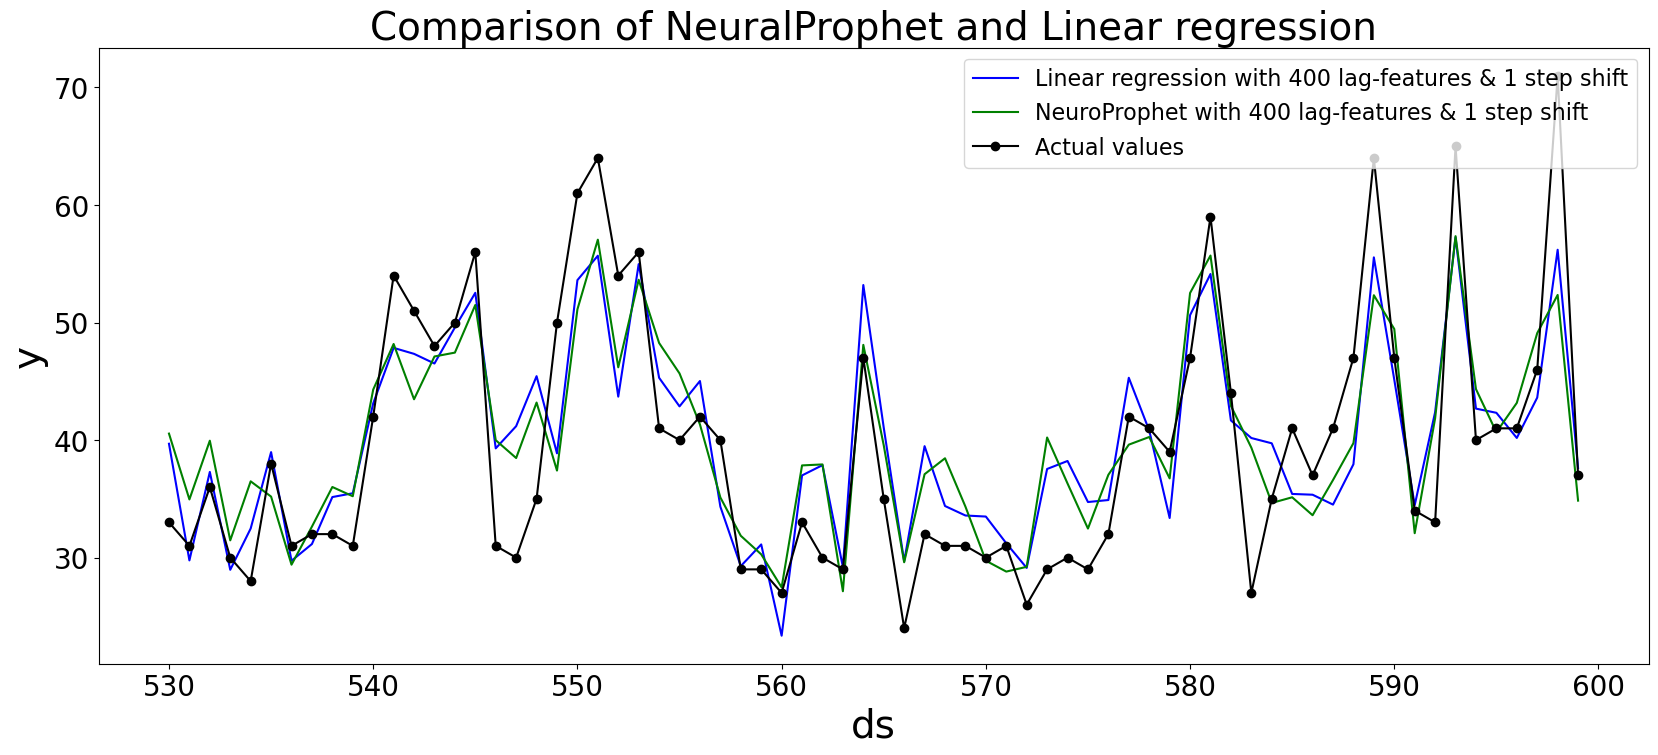

In [45]:
linreg_graph_data = pred_test400[1:].copy()
linreg_graph_data = list(linreg_graph_data)
linreg_graph_data.append(linreg_mean)
nprophet_graph_data = experiments_dict["experiment six"]['yhat1'][1:].copy()
nprophet_graph_data = list(nprophet_graph_data)
nprophet_graph_data.append(nprophet_mean)
fig, ax = plt.subplots(figsize=(20, 8))  
ax.plot(pd.Series(linreg_graph_data)[530:600], '-r', color='blue', label="Linear regression with 400 lag-features & 1 step shift")
ax.plot(pd.Series(nprophet_graph_data)[530:600], '-r', color='green', label="NeuroProphet with 400 lag-features & 1 step shift")
ax.plot(experiments_dict["experiment six"]["y"][530:600], '-o', color='black', label="Actual values")
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("ds", fontsize=28)
ax.set_ylabel("y", fontsize=28)
ax.set_title("Comparison of NeuralProphet and Linear regression", fontsize=28)
plt.show()

In [47]:
### Mean baseline metrics
mean_baseline1 = [y_train400.mean()]*len(y_test400)
print('RMSE:', np.sqrt(MSE(y_test400, mean_baseline1)))

RMSE: 10.841823989709217
